# Importing Libraries

In [1]:
# Numpy
import numpy as np

# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

# Seaborn
import seaborn as sns

# RegEx
import re

# Reading the Dataset


NOC: https://drive.google.com/file/d/15KJKTtlrvsILcPp9cASDm-AMhhv5Cq-G/view?usp=sharing

Athlete: https://drive.google.com/file/d/1stu-JrwFFcDRcFRMXtDDfhrX_ghOpuwD/view?usp=sharing

In [3]:
athlete = pd.read_csv("/content/drive/MyDrive/Datasets/athlete_events.csv")
noc = pd.read_csv("/content/drive/MyDrive/Datasets/noc_regions.csv")

# Creating the copy of the DataFrame

In [4]:
ath = athlete.copy()
nat = noc.copy()

# Data Exploration

In [ ]:
ath.head(1)

In [ ]:
ath.tail()

In [ ]:
nat.head()

In [ ]:
ath.info()

In [ ]:
ath.describe()

In [13]:
ath.shape

(271116, 15)

In [ ]:
ath.isnull().sum()

# Data Cleaning & Data Manipulation

1. Add a new column "region" to the ath DataFrame. And the region column should have the regions according to the elements in the NOC columns of the "nat" DataFrame.

In [21]:
region_col = ath['NOC'].map(nat.set_index('NOC')['region'])
ath.insert(7, 'region', region_col)

In [ ]:
ath

2. Drop the columns "NOC" from the DataFrame "ath"

In [23]:
ath.drop("NOC", inplace = True, axis =1)

In [ ]:
ath.head()

3. Handling the null values in the columns - "Age", "Height" & "Weight" by the mean of the respective columns.

In [ ]:
ath.isnull().sum()

In [ ]:
ath[ath.Age.isnull()].head()

In [29]:
ath['Age'].fillna(ath.Age.mean(), inplace=True)
ath['Height'].fillna(ath.Height.mean(), inplace=True)
ath['Weight'].fillna(ath.Weight.mean(), inplace=True)

In [ ]:
ath.iloc[[147]]

In [ ]:
ath.isnull().sum()

4. List out all the values of the region columns where the values are null.

In [ ]:
ath[ath.region.isna()].head()

In [ ]:
nat.head()

In [ ]:
nat.where(nat['region']=='Singapore')

5. Handling the null values in the column "Medals"

In [ ]:
ath.head()

In [44]:
ath['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [45]:
ath['Medal'].nunique()

3

In [46]:
ath['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [ ]:
# Replace 
# NaN with 0
# Gold with 1
# Silver with 2
# Bronze with 3

In [51]:
ath['Medal'].replace([np.nan],[0], inplace=True)

In [52]:
ath.head()

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.00000,80.000000,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0.0
1,2,A Lamusi,M,23.0,170.00000,60.000000,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0.0
2,3,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,Denmark,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0.0
3,4,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,Denmark,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1.0
4,5,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,Netherlands,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0.0


In [53]:
ath['Medal'].value_counts()

0.0    231333
1.0     13372
3.0     13295
2.0     13116
Name: Medal, dtype: int64

In [54]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  float64
dtypes: float64(4), int64(2), object(9)
memory usage: 31.0+ MB


In [57]:
ath.Medal = ath.Medal.astype(int)

In [58]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   region  270746 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 31.0+ MB


In [59]:
ath.isnull().sum()

ID          0
Name        0
Gender      0
Age         0
Height      0
Weight      0
Team        0
region    370
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
dtype: int64

In [ ]:
ath.head()

6. dropping off the un-wanted/irrelavant columns

In [61]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,region,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,China,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,China,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0


In [62]:
# Columns to be drop off -

# 1. region
# 2. Games

ath.drop(["region","Games"],axis = 1,inplace =True)

In [68]:
ath.head(1)

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0


7. Remove the unwanted phrases from the "Event" column

In [ ]:
re.sub('','',ath.Event)

In [80]:
for i,j in zip(ath.Sport,range(len(ath.Event))):
  ath.Event[j] = re.sub(f"{i}\s","",ath.Event[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
ath.head(10)

In [84]:
ath.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Gender  271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   Year    271116 non-null  int64  
 8   Season  271116 non-null  object 
 9   City    271116 non-null  object 
 10  Sport   271116 non-null  object 
 11  Event   271116 non-null  object 
 12  Medal   271116 non-null  int64  
dtypes: float64(3), int64(3), object(7)
memory usage: 26.9+ MB


8. Changing the dtype of the "Age" column as int

In [86]:
ath.Age = ath.Age.astype(int)

In [ ]:
ath.info()

# Exportation of the DataFrame

In [ ]:
# Export to JSON
ath.to_json("athletes_dataset.json")

# Export to Excel
ath.to_excel("athletes_dataset.xlsx")

# Export to .CSV
ath.to_csv("athletes_dataset.csv")

# Data Analysis

1. Show the relationship between Height and Weight

Text(0, 0.5, 'Weight')

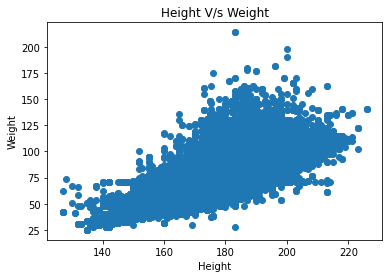

In [89]:
x = ath.Height
y = ath.Weight
plt.scatter(x,y)
plt.title("Height V/s Weight")
plt.xlabel("Height")
plt.ylabel("Weight")

Conclusion: 

2. Find out how many male and female had participated in the Olympics during 1896 to 2016

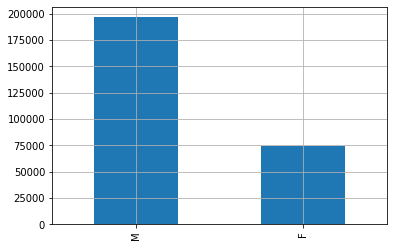

In [95]:
at['Gender'].value_counts().plot.bar(at['Gender'])
plt.grid()

3. How many Male and Female have participated in the Summer and Winter Olympics

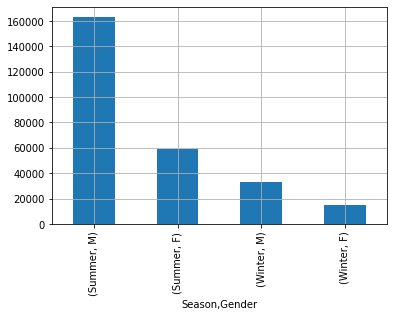

In [96]:
ath['Gender'].groupby(ath['Season']).value_counts().plot.bar(ath['Gender'])
plt.grid()
plt.show()

In [106]:
import plotly.express as px

In [111]:
fig = px.histogram(ath, x=ath.Season, color=ath.Gender, barmode = "group",
                   color_discrete_map={"M":"#BA55D3", "F":"#DEB887"})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

4. Name the Top 5 countries who have the most medals

In [112]:
ath.head(2)

,ID,Name,Gender,Age,Height,Weight,Team,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24,180.0,80.0,China,1992,Summer,Barcelona,Basketball,Men's Basketball,0
1,2,A Lamusi,M,23,170.0,60.0,China,2012,Summer,London,Judo,Men's Extra-Lightweight,0


In [114]:
(ath.groupby(ath['Team'])['Medal'].sum()).sort_values(ascending=False).head(5)

Team
United States    9197
Soviet Union     4521
Germany          3967
Great Britain    3399
France           3222
Name: Medal, dtype: int64

In [116]:
fig = px.histogram(ath.Medal, x = ath.Team)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [125]:
fig = px.histogram(ath[ath['Gender']=='F']['Gender'], x=ath.Year)
fig.show()

In [ ]:
ath[ath.Gender == "F"]